In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

cwd = os.getcwd()
sys.path.append(cwd+'/../')

In [2]:
def plot_metrics(pruning_method='energy', arch = 'LeNet_5', stage = '0'):
    def plot_energy_cost(pruning_method='energy', arch = 'LeNet_5', stage = '0'):
        prefix = 'logs/{}/{}/stage_{}'.format(pruning_method, arch, stage)
        paths = [prefix+'.csv', prefix+'_pruning_order.csv', prefix+'_search_history.csv']
        df_0 = pd.read_csv(paths[0])
        df_1 = pd.read_csv(paths[1])
        df_2 = pd.read_csv(paths[2])
        df_data = df_0.loc[:, 'nvm_read_inputs':'vm_write_psum']
        NVM_COST = 60
        nvm = ['nvm_read_inputs', 'nvm_read_weights', 'nvm_jobs']
        df_energy_cost = df_data.copy()

        for item in nvm:
            df_energy_cost[item] = df_data[item] * NVM_COST
        df_energy_cost

        df_energy_cost.plot(kind="bar",stacked=True,figsize=(10,8))
        plt.show()

        inputs_cost = df_energy_cost['nvm_read_inputs'] + df_energy_cost['vm_read_inputs']
        weights_cost = df_energy_cost['nvm_read_weights'] + df_energy_cost['vm_read_weights']
        psum_cost = df_energy_cost['nvm_jobs'] + df_energy_cost['vm_jobs'] + df_energy_cost['vm_read_psum'] + df_energy_cost['vm_write_psum']
        df_energy_class = pd.DataFrame()
        df_energy_class['inputs_cost'] = inputs_cost
        df_energy_class['weights_cost'] = weights_cost
        df_energy_class['psum_cost'] = psum_cost
        df_energy_class.plot(kind="bar",stacked=True,figsize=(10,8))
        plt.show()

    def plot_job(pruning_method='intermittent', arch = 'LeNet_5', stage = '0'):
        prefix = 'logs/{}/{}/stage_{}'.format(pruning_method, arch, stage)
        paths = [prefix+'.csv', prefix+'_pruning_order.csv', prefix+'_search_history.csv']
        df_0 = pd.read_csv(paths[0])
        df_1 = pd.read_csv(paths[1])
        df_2 = pd.read_csv(paths[2])
        df_data = df_0.loc[:, 'job']
        df_job = df_data.copy()

        df_job.plot(kind="bar",figsize=(10,8))
        plt.show()
    
    if pruning_method == 'intermittent':
        plot_job(pruning_method=pruning_method, arch=arch, stage=stage)
    elif pruning_method == 'energy':
        plot_energy_cost(pruning_method=pruning_method, arch=arch, stage=stage)

In [3]:
pruning_method = 'energy'
arch = 'LeNet_5'

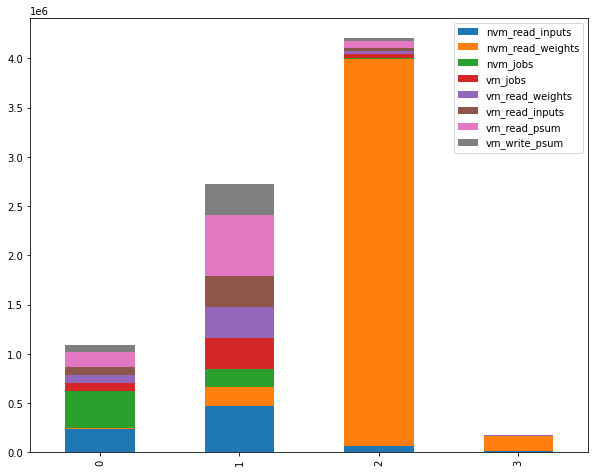

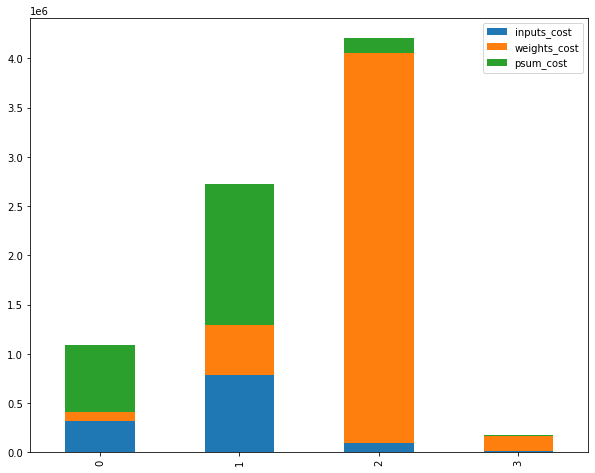

In [4]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='0')

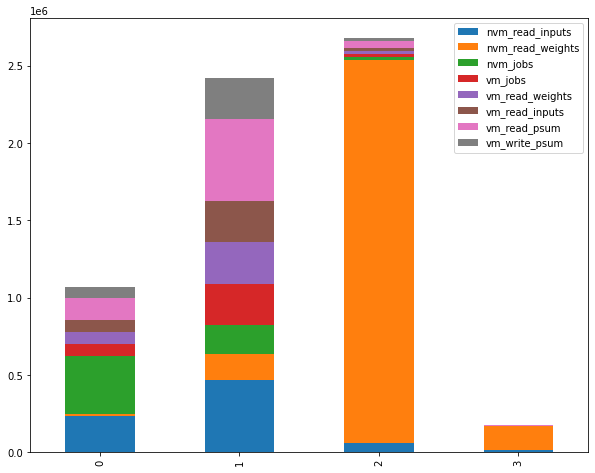

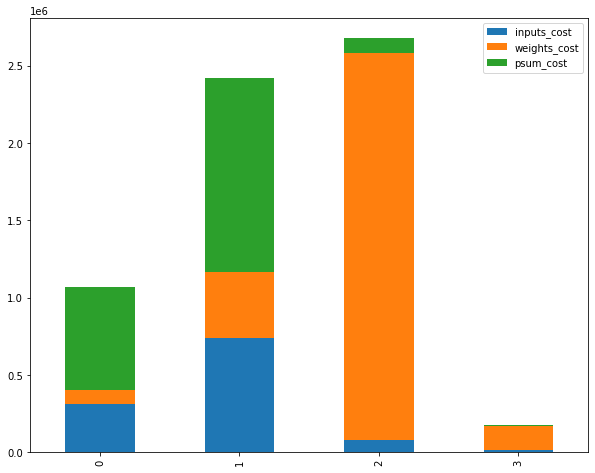

In [5]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='1')

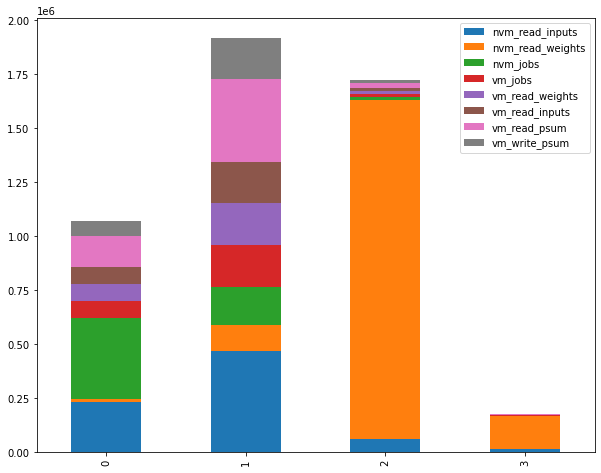

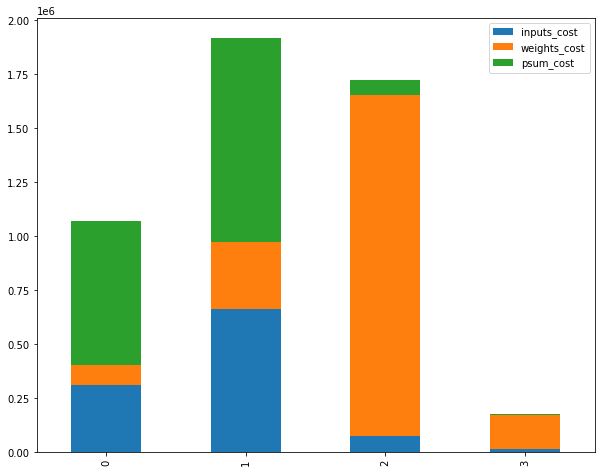

In [6]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='2')

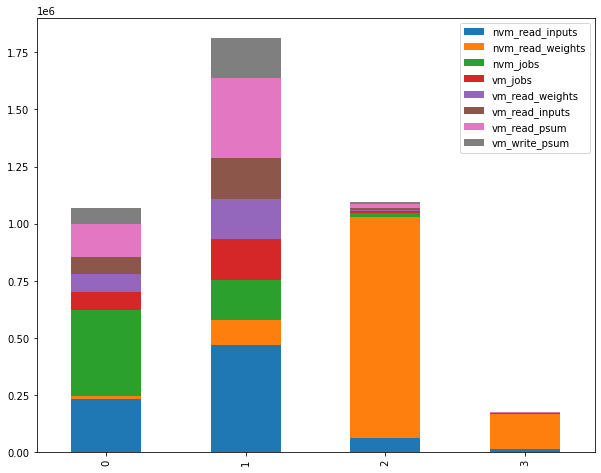

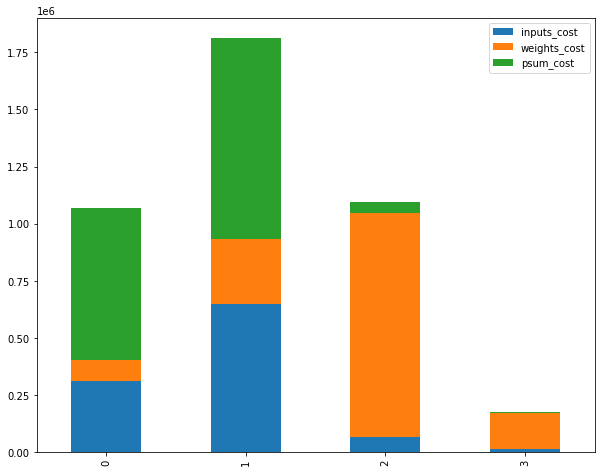

In [7]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='3')

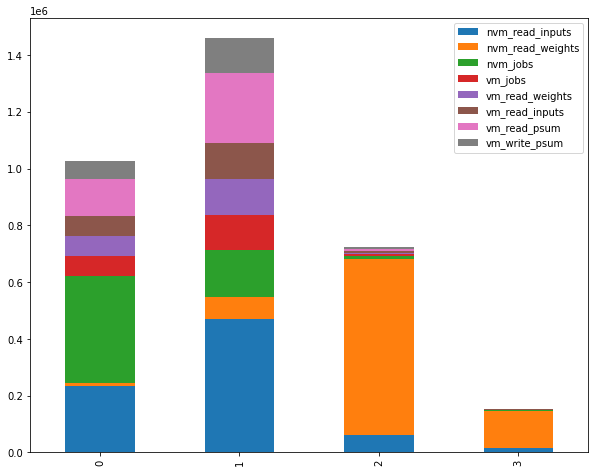

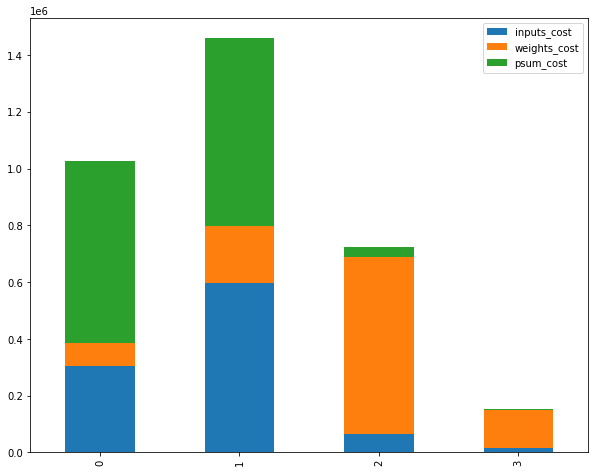

In [8]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='4')

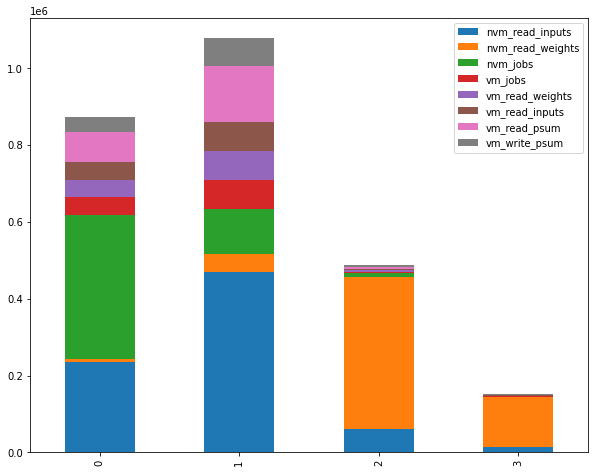

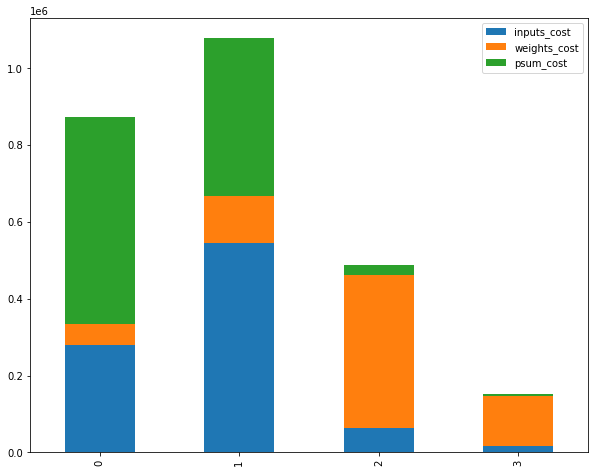

In [11]:
plot_metrics(pruning_method=pruning_method, arch=arch, stage='5')